In [ ]:
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Path dataset ZIP dan folder tujuan ekstraksi
zip_path = "/content/datasetnolb.zip"
extract_path = "/content/datasetnolb"

# Cek apakah folder sudah diekstrak, jika belum maka ekstrak
if not os.path.exists(extract_path):
    print("Mengekstrak dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
    print("Ekstraksi selesai!")

# Fungsi segmentasi dan penghapusan warna yang berbeda
def segmentasi_kmeans_hapus_background(image_path, k=3):
    img = cv2.imread(image_path)

    if img is None:
        raise ValueError(f"Gambar tidak ditemukan di path: {image_path}")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Ubah ke bentuk 2D untuk K-Means
    pixel_values = img_hsv.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Terapkan K-Means Clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)

    # Bentuk ulang ke gambar asli
    segmented_image = centers[labels].reshape(img_hsv.shape)
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)

    # Tentukan klaster dominan (warna yang paling banyak muncul)
    unique, counts = np.unique(labels, return_counts=True)
    dominant_cluster = unique[np.argmax(counts)]  # Ambil klaster terbesar

    # Buat mask: hanya tampilkan bagian dengan warna dominan
    mask = (labels == dominant_cluster).reshape(img.shape[:2])  # Reshape ke ukuran gambar
    hasil_bersih = img_rgb.copy()
    hasil_bersih[~mask] = [255, 255, 255]  # Set bagian lain menjadi putih

    return img_rgb, segmented_image_rgb, hasil_bersih

# Path gambar yang ingin diproses
image_path = os.path.join(extract_path, "350.jpg")

# Cek apakah file gambar tersedia sebelum diproses
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Gambar {image_path} tidak ditemukan!")

# Jalankan segmentasi + hapus background
original, segmented, cleaned = segmentasi_kmeans_hapus_background(image_path, k=4)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(segmented)
plt.title("Segmentasi dengan HSV")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cleaned)
plt.title("Hanya Warna Dominan (Tanpa Background)")
plt.axis("off")

plt.show()


Mengekstrak dataset...
Ekstraksi selesai!


KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fungsi segmentasi dan penghapusan warna yang berbeda
def segmentasi_kmeans_hapus_background(image_path, k=3):
    img = cv2.imread(image_path)

    if img is None:
        raise ValueError(f"Gambar tidak ditemukan di path: {image_path}")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Ubah ke bentuk 2D untuk K-Means
    pixel_values = img_hsv.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Terapkan K-Means Clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)

    # Bentuk ulang ke gambar asli
    segmented_image = centers[labels].reshape(img_hsv.shape)
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)

    # Tentukan klaster dominan (warna yang paling banyak muncul)
    unique, counts = np.unique(labels, return_counts=True)
    dominant_cluster = unique[np.argmax(counts)]  # Ambil klaster terbesar

    # Buat mask: hanya tampilkan bagian dengan warna dominan
    mask = (labels == dominant_cluster).reshape(img.shape[:2])  # Reshape ke ukuran gambar
    hasil_bersih = img_rgb.copy()
    hasil_bersih[~mask] = [255, 255, 255]  # Set bagian lain menjadi putih

    return img_rgb, segmented_image_rgb, hasil_bersih

# Path folder dataset
dataset_path = "/content/datasetnolb"

# Ambil semua gambar dalam folder
image_files = [f for f in os.listdir(dataset_path) if f.endswith(".jpg")]

if not image_files:
    raise ValueError("Tidak ada gambar yang ditemukan di folder dataset!")

# Tentukan jumlah gambar yang akan ditampilkan
num_images = len(image_files)
cols = 3  # Kolom untuk Original, Segmentasi, dan Background Removed
rows = num_images  # Baris sesuai jumlah gambar

plt.figure(figsize=(cols * 5, rows * 5))

# Proses dan tampilkan semua gambar
for i, filename in enumerate(image_files):
    image_path = os.path.join(dataset_path, filename)

    try:
        original, segmented, cleaned = segmentasi_kmeans_hapus_background(image_path, k=4)

        plt.subplot(rows, cols, i * cols + 1)
        plt.imshow(original)
        plt.title(f"{filename} - Original")
        plt.axis("off")

        plt.subplot(rows, cols, i * cols + 2)
        plt.imshow(segmented)
        plt.title(f"{filename} - Segmentasi")
        plt.axis("off")

        plt.subplot(rows, cols, i * cols + 3)
        plt.imshow(cleaned)
        plt.title(f"{filename} - Background Removed")
        plt.axis("off")

    except Exception as e:
        print(f"Error memproses {filename}: {e}")

plt.tight_layout()
plt.show()


In [ ]:
import os
import zipfile
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
import zipfile

zip_path = '/content/datasetnolb.zip'
extract_path = '/content/'

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'File berhasil diekstrak ke {extract_path}')

File berhasil diekstrak ke /content/


In [ ]:
# Fungsi segmentasi K-Means (HSV) untuk menghapus latar belakang
def segmentasi_kmeans(image, k=3):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Ubah ke bentuk 2D untuk K-Means
    pixel_values = img_hsv.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Terapkan K-Means Clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)

    # Bentuk ulang ke gambar asli
    segmented_image = centers[labels].reshape(img_hsv.shape)
    segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_HSV2RGB)

    # Tentukan klaster dominan (warna yang paling banyak muncul)
    unique, counts = np.unique(labels, return_counts=True)
    dominant_cluster = unique[np.argmax(counts)]  # Ambil klaster terbesar

    # Buat mask: hanya tampilkan bagian dengan warna dominan
    mask = (labels == dominant_cluster).reshape(image.shape[:2])  # Reshape ke ukuran gambar
    hasil_bersih = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hasil_bersih[~mask] = [255, 255, 255]  # Set bagian lain menjadi putih

    return hasil_bersih

In [ ]:
# Load dataset
image_dir = '/content/datasetnolb'
images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)

        # Baca gambar
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Segmentasi dengan K-Means
        segmented_img = segmentasi_kmeans(img, k=4)

        # Resize ke 224x224 untuk CNN
        segmented_img = cv2.resize(segmented_img, (224, 224))
        img_array = segmented_img / 255.0  # Normalisasi

        # Ambil label dari nama file (misalnya: 350.jpg → label = 350)
        label = int(filename.split('.')[0])

        images.append(img_array)
        labels.append(label)

# Konversi ke array numpy
X = np.array(images)
y = np.array(labels)

In [ ]:
# CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Prediksi bobot sapi
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model.fit(
    X, y,
    epochs=350,
    batch_size=32,
    callbacks=[checkpoint]
)

Epoch 1/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 288037.0625 - mae: 481.5098
Epoch 1: loss improved from inf to 288037.06250, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 288037.0625 - mae: 481.5098
Epoch 2/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 262140.8281 - mae: 454.0348
Epoch 2: loss improved from 288037.06250 to 262140.82812, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 262140.8281 - mae: 454.0348
Epoch 3/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 212190.1406 - mae: 395.5336
Epoch 3: loss improved from 262140.82812 to 212190.14062, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 212190.1406 - mae: 395.5336
Epoch 4/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 135019.6406 - mae: 285.5392
Epoch 4: loss improved from 212190.14062 to 135019.64062, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 135019.6406 - mae: 285.5392
Epoch 5/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 61583.4062 - mae: 195.0238
Epoch 5: loss improved from 135019.64062 to 61583.40625, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 61583.4062 - mae: 195.0238
Epoch 6/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 119920.1484 - mae: 308.3341
Epoch 6: loss did not improve from 61583.40625
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 119920.1484 - mae: 308.3341
Epoch 7/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 104829.2734 - mae: 287.3761
Epoch 7: loss did not improve from 61583.40625
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 104829.2734 - mae: 287.3761
Epoch 8/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 64206.9336 - mae: 219.1805
Epoch 8: loss did not improve from 61583.40625
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 64206.9336 - mae: 219.1805
Epoch 9/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 56208.6992 - mae: 195.6190
Epoch 9: loss improved from 61583.40625 to 56208.69922, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 56208.6992 - mae: 195.6190
Epoch 10/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 67278.6641 - mae: 194.1186
Epoch 10: loss did not improve from 56208.69922
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 67278.6641 - mae: 194.1186
Epoch 11/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 78178.1875 - mae: 203.0048
Epoch 11: loss did not improve from 56208.69922
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 78178.1875 - mae: 203.0048
Epoch 12/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 81677.7109 - mae: 208.3768
Epoch 12: loss did not improve from 56208.69922
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 81677.7109 - mae: 208.3768
Epoch 13/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 77394.0391 - mae: 201.6581
Epoch 13: loss did not improve from 56208.69922
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 77394.0391 - mae: 201.6581
Epoch 14/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 67835.4609 - mae: 192.3019
Epoch 14: loss did not improve fr

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 53840.8711 - mae: 196.8016
Epoch 17/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 60956.9883 - mae: 214.0909
Epoch 17: loss did not improve from 53840.87109
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 60956.9883 - mae: 214.0909
Epoch 18/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 66562.4531 - mae: 223.2364
Epoch 18: loss did not improve from 53840.87109
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 66562.4531 - mae: 223.2364
Epoch 19/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 62046.1680 - mae: 216.2353
Epoch 19: loss did not improve from 53840.87109
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 62046.1680 - mae: 216.2353
Epoch 20/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 55296.0820 - mae: 201.6881
Epoch 20: loss did not improve from 53840.87109
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 55296.0820 - mae: 201.6881
Epoch 21/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 52527.4219 - mae: 193.9451
Epoch 21: loss improved from 5384

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 52527.4219 - mae: 193.9451
Epoch 22/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 53729.3242 - mae: 190.1155
Epoch 22: loss did not improve from 52527.42188
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 53729.3242 - mae: 190.1155
Epoch 23/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 55998.7305 - mae: 189.6592
Epoch 23: loss did not improve from 52527.42188
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 55998.7305 - mae: 189.6592
Epoch 24/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 56907.5938 - mae: 189.2624
Epoch 24: loss did not improve from 52527.42188
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 56907.5938 - mae: 189.2624
Epoch 25/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 55729.4180 - mae: 188.8502
Epoch 25: loss did not improve from 52527.42188
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 55729.4180 - mae: 188.8502
Epoch 26/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 53238.3008 - mae: 188.3634
Epoch 26: loss did not improve fr

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 51222.9805 - mae: 190.4463
Epoch 28/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 51754.4062 - mae: 196.1626
Epoch 28: loss did not improve from 51222.98047
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 51754.4062 - mae: 196.1626
Epoch 29/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 53361.1562 - mae: 199.4296
Epoch 29: loss did not improve from 51222.98047
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 53361.1562 - mae: 199.4296
Epoch 30/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 52490.0508 - mae: 198.2206
Epoch 30: loss did not improve from 51222.98047
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 52490.0508 - mae: 198.2206
Epoch 31/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 50188.1055 - mae: 193.8006
Epoch 31: loss improved from 51222.98047 to 50188.10547, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 50188.1055 - mae: 193.8006
Epoch 32/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 49314.4375 - mae: 189.2844
Epoch 32: loss improved from 50188.10547 to 49314.43750, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 49314.4375 - mae: 189.2844
Epoch 33/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 49559.4727 - mae: 185.6939
Epoch 33: loss did not improve from 49314.43750
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 49559.4727 - mae: 185.6939
Epoch 34/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 49674.3633 - mae: 183.6573
Epoch 34: loss did not improve from 49314.43750
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 49674.3633 - mae: 183.6573
Epoch 35/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 48893.5352 - mae: 183.3751
Epoch 35: loss improved from 49314.43750 to 48893.53516, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 48893.5352 - mae: 183.3751
Epoch 36/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 47530.1445 - mae: 184.6235
Epoch 36: loss improved from 48893.53516 to 47530.14453, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 47530.1445 - mae: 184.6235
Epoch 37/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 46661.5938 - mae: 186.9108
Epoch 37: loss improved from 47530.14453 to 46661.59375, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 46661.5938 - mae: 186.9108
Epoch 38/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 46376.9688 - mae: 188.2358
Epoch 38: loss improved from 46661.59375 to 46376.96875, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 46376.9688 - mae: 188.2358
Epoch 39/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 45786.1250 - mae: 187.5907
Epoch 39: loss improved from 46376.96875 to 45786.12500, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 45786.1250 - mae: 187.5907
Epoch 40/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 43943.0938 - mae: 183.5302
Epoch 40: loss improved from 45786.12500 to 43943.09375, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 43943.0938 - mae: 183.5302
Epoch 41/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 42557.5742 - mae: 178.3374
Epoch 41: loss improved from 43943.09375 to 42557.57422, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 42557.5742 - mae: 178.3374
Epoch 42/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 41970.4844 - mae: 175.0003
Epoch 42: loss improved from 42557.57422 to 41970.48438, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 41970.4844 - mae: 175.0003
Epoch 43/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 41034.4961 - mae: 173.5632
Epoch 43: loss improved from 41970.48438 to 41034.49609, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 41034.4961 - mae: 173.5632
Epoch 44/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 39867.6680 - mae: 173.6964
Epoch 44: loss improved from 41034.49609 to 39867.66797, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 39867.6680 - mae: 173.6964
Epoch 45/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 39019.6992 - mae: 173.4770
Epoch 45: loss improved from 39867.66797 to 39019.69922, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 39019.6992 - mae: 173.4770
Epoch 46/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 37695.1680 - mae: 170.0588
Epoch 46: loss improved from 39019.69922 to 37695.16797, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 37695.1680 - mae: 170.0588
Epoch 47/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 36462.7617 - mae: 165.5808
Epoch 47: loss improved from 37695.16797 to 36462.76172, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 36462.7617 - mae: 165.5808
Epoch 48/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 35230.5586 - mae: 162.4539
Epoch 48: loss improved from 36462.76172 to 35230.55859, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 35230.5586 - mae: 162.4539
Epoch 49/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 33777.6055 - mae: 159.9635
Epoch 49: loss improved from 35230.55859 to 33777.60547, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 33777.6055 - mae: 159.9635
Epoch 50/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 32307.6875 - mae: 157.9452
Epoch 50: loss improved from 33777.60547 to 32307.68750, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 32307.6875 - mae: 157.9452
Epoch 51/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 30543.1973 - mae: 152.1799
Epoch 51: loss improved from 32307.68750 to 30543.19727, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 30543.1973 - mae: 152.1799
Epoch 52/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 28868.3984 - mae: 144.6294
Epoch 52: loss improved from 30543.19727 to 28868.39844, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 28868.3984 - mae: 144.6294
Epoch 53/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 27216.1797 - mae: 141.1233
Epoch 53: loss improved from 28868.39844 to 27216.17969, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 27216.1797 - mae: 141.1233
Epoch 54/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 25562.1309 - mae: 138.4261
Epoch 54: loss improved from 27216.17969 to 25562.13086, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 25562.1309 - mae: 138.4261
Epoch 55/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 24052.1660 - mae: 134.4082
Epoch 55: loss improved from 25562.13086 to 24052.16602, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 24052.1660 - mae: 134.4082
Epoch 56/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 22388.2402 - mae: 123.2032
Epoch 56: loss improved from 24052.16602 to 22388.24023, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 22388.2402 - mae: 123.2032
Epoch 57/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 20675.2441 - mae: 117.6105
Epoch 57: loss improved from 22388.24023 to 20675.24414, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 20675.2441 - mae: 117.6105
Epoch 58/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 18837.4941 - mae: 113.4910
Epoch 58: loss improved from 20675.24414 to 18837.49414, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 18837.4941 - mae: 113.4910
Epoch 59/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 17032.9414 - mae: 105.3537
Epoch 59: loss improved from 18837.49414 to 17032.94141, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17032.9414 - mae: 105.3537
Epoch 60/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 15462.7705 - mae: 89.6347
Epoch 60: loss improved from 17032.94141 to 15462.77051, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 15462.7705 - mae: 89.6347
Epoch 61/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 13747.2021 - mae: 85.8478
Epoch 61: loss improved from 15462.77051 to 13747.20215, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13747.2021 - mae: 85.8478
Epoch 62/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 12643.8154 - mae: 79.5537
Epoch 62: loss improved from 13747.20215 to 12643.81543, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 12643.8154 - mae: 79.5537
Epoch 63/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 12031.1562 - mae: 65.2987
Epoch 63: loss improved from 12643.81543 to 12031.15625, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12031.1562 - mae: 65.2987
Epoch 64/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 11470.8896 - mae: 68.5324
Epoch 64: loss improved from 12031.15625 to 11470.88965, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 11470.8896 - mae: 68.5324
Epoch 65/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 11421.1338 - mae: 69.7515
Epoch 65: loss improved from 11470.88965 to 11421.13379, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 11421.1338 - mae: 69.7515
Epoch 66/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 11840.8369 - mae: 74.8248
Epoch 66: loss did not improve from 11421.13379
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11840.8369 - mae: 74.8248
Epoch 67/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 12304.0625 - mae: 83.1063
Epoch 67: loss did not improve from 11421.13379
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 12304.0625 - mae: 83.1063
Epoch 68/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 12496.9922 - mae: 82.7757
Epoch 68: loss did not improve from 11421.13379
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 12496.9922 - mae: 82.7757
Epoch 69/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 12493.5986 - mae: 85.8308
Epoch 69: loss did not improve from 11421.13379
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12493.5986 - mae: 85.8308
Epoch 70/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 12408.5781 - mae: 85.5542
Epoch 70: loss did not improve from 11421.1

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 11021.6299 - mae: 75.9720
Epoch 75/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 10654.1855 - mae: 71.9797
Epoch 75: loss improved from 11021.62988 to 10654.18555, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 10654.1855 - mae: 71.9797
Epoch 76/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 10432.9766 - mae: 66.5433
Epoch 76: loss improved from 10654.18555 to 10432.97656, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 10432.9766 - mae: 66.5433
Epoch 77/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 10178.0977 - mae: 65.8083
Epoch 77: loss improved from 10432.97656 to 10178.09766, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 10178.0977 - mae: 65.8083
Epoch 78/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 9963.0947 - mae: 60.6465
Epoch 78: loss improved from 10178.09766 to 9963.09473, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 9963.0947 - mae: 60.6465
Epoch 79/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 9884.4297 - mae: 57.5882
Epoch 79: loss improved from 9963.09473 to 9884.42969, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9884.4297 - mae: 57.5882
Epoch 80/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 9851.1895 - mae: 62.7527
Epoch 80: loss improved from 9884.42969 to 9851.18945, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 9851.1895 - mae: 62.7527
Epoch 81/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 9761.9736 - mae: 57.5268
Epoch 81: loss improved from 9851.18945 to 9761.97363, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 9761.9736 - mae: 57.5268
Epoch 82/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 9684.1240 - mae: 59.0663
Epoch 82: loss improved from 9761.97363 to 9684.12402, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 9684.1240 - mae: 59.0663
Epoch 83/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 9657.4248 - mae: 62.1846
Epoch 83: loss improved from 9684.12402 to 9657.42480, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 9657.4248 - mae: 62.1846
Epoch 84/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 9582.5947 - mae: 58.3822
Epoch 84: loss improved from 9657.42480 to 9582.59473, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9582.5947 - mae: 58.3822
Epoch 85/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 9449.7471 - mae: 59.9339
Epoch 85: loss improved from 9582.59473 to 9449.74707, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9449.7471 - mae: 59.9339
Epoch 86/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 9337.7080 - mae: 60.1735
Epoch 86: loss improved from 9449.74707 to 9337.70801, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 9337.7080 - mae: 60.1735
Epoch 87/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 9233.8721 - mae: 57.6624
Epoch 87: loss improved from 9337.70801 to 9233.87207, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 9233.8721 - mae: 57.6624
Epoch 88/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 9075.4160 - mae: 59.7425
Epoch 88: loss improved from 9233.87207 to 9075.41602, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 9075.4160 - mae: 59.7425
Epoch 89/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 8898.8086 - mae: 56.8655
Epoch 89: loss improved from 9075.41602 to 8898.80859, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8898.8086 - mae: 56.8655
Epoch 90/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 8746.5420 - mae: 54.7264
Epoch 90: loss improved from 8898.80859 to 8746.54199, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 8746.5420 - mae: 54.7264
Epoch 91/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 8595.9805 - mae: 56.9535
Epoch 91: loss improved from 8746.54199 to 8595.98047, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 8595.9805 - mae: 56.9535
Epoch 92/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 8427.5508 - mae: 51.2812
Epoch 92: loss improved from 8595.98047 to 8427.55078, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8427.5508 - mae: 51.2812
Epoch 93/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 8258.4551 - mae: 52.3616
Epoch 93: loss improved from 8427.55078 to 8258.45508, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8258.4551 - mae: 52.3616
Epoch 94/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 8116.6987 - mae: 52.1836
Epoch 94: loss improved from 8258.45508 to 8116.69873, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8116.6987 - mae: 52.1836
Epoch 95/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 7995.5664 - mae: 50.5987
Epoch 95: loss improved from 8116.69873 to 7995.56641, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7995.5664 - mae: 50.5987
Epoch 96/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 7871.6250 - mae: 54.0394
Epoch 96: loss improved from 7995.56641 to 7871.62500, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7871.6250 - mae: 54.0394
Epoch 97/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7741.1030 - mae: 50.5908
Epoch 97: loss improved from 7871.62500 to 7741.10303, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 7741.1030 - mae: 50.5908
Epoch 98/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7603.4233 - mae: 52.8359
Epoch 98: loss improved from 7741.10303 to 7603.42334, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 7603.4233 - mae: 52.8359
Epoch 99/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7465.9858 - mae: 51.0195
Epoch 99: loss improved from 7603.42334 to 7465.98584, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7465.9858 - mae: 51.0195
Epoch 100/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 7326.7891 - mae: 50.6438
Epoch 100: loss improved from 7465.98584 to 7326.78906, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7326.7891 - mae: 50.6438
Epoch 101/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 7183.9478 - mae: 51.1450
Epoch 101: loss improved from 7326.78906 to 7183.94775, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7183.9478 - mae: 51.1450
Epoch 102/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7039.9590 - mae: 49.1453
Epoch 102: loss improved from 7183.94775 to 7039.95898, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 7039.9590 - mae: 49.1453
Epoch 103/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 6899.9761 - mae: 50.9190
Epoch 103: loss improved from 7039.95898 to 6899.97607, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6899.9761 - mae: 50.9190
Epoch 104/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 6805.5718 - mae: 47.9984
Epoch 104: loss improved from 6899.97607 to 6805.57178, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 6805.5718 - mae: 47.9984
Epoch 105/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 6812.0884 - mae: 54.2041
Epoch 105: loss did not improve from 6805.57178
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 6812.0884 - mae: 54.2041
Epoch 106/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7079.0015 - mae: 51.8580
Epoch 106: loss did not improve from 6805.57178
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7079.0015 - mae: 51.8580
Epoch 107/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 7287.8687 - mae: 66.6128
Epoch 107: loss did not improve from 6805.57178
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7287.8687 - mae: 66.6128
Epoch 108/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 7092.6016 - mae: 52.6426
Epoch 108: loss did not improve from 6805.57178
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 7092.6016 - mae: 52.6426
Epoch 109/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 6086.3589 - mae: 46.1968
Epoch 109: loss improved from 6805.57178 to 6086

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 6086.3589 - mae: 46.1968
Epoch 110/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 6223.1187 - mae: 53.8595
Epoch 110: loss did not improve from 6086.35889
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6223.1187 - mae: 53.8595
Epoch 111/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 6713.1685 - mae: 50.4724
Epoch 111: loss did not improve from 6086.35889
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6713.1685 - mae: 50.4724
Epoch 112/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 5900.2812 - mae: 50.6188
Epoch 112: loss improved from 6086.35889 to 5900.28125, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5900.2812 - mae: 50.6188
Epoch 113/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 5677.9585 - mae: 46.5403
Epoch 113: loss improved from 5900.28125 to 5677.95850, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5677.9585 - mae: 46.5403
Epoch 114/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 6104.0332 - mae: 47.5691
Epoch 114: loss did not improve from 5677.95850
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6104.0332 - mae: 47.5691
Epoch 115/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5614.3633 - mae: 50.6634
Epoch 115: loss improved from 5677.95850 to 5614.36328, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5614.3633 - mae: 50.6634
Epoch 116/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5255.0200 - mae: 39.8853
Epoch 116: loss improved from 5614.36328 to 5255.02002, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5255.0200 - mae: 39.8853
Epoch 117/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5497.1597 - mae: 43.7106
Epoch 117: loss did not improve from 5255.02002
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5497.1597 - mae: 43.7106
Epoch 118/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 5307.8203 - mae: 50.1746
Epoch 118: loss did not improve from 5255.02002
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5307.8203 - mae: 50.1746
Epoch 119/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4915.5249 - mae: 35.4210
Epoch 119: loss improved from 5255.02002 to 4915.52490, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4915.5249 - mae: 35.4210
Epoch 120/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 4912.3359 - mae: 37.8445
Epoch 120: loss improved from 4915.52490 to 4912.33594, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4912.3359 - mae: 37.8445
Epoch 121/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 4949.1929 - mae: 48.4832
Epoch 121: loss did not improve from 4912.33594
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4949.1929 - mae: 48.4832
Epoch 122/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 4703.1313 - mae: 37.2604
Epoch 122: loss improved from 4912.33594 to 4703.13135, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4703.1313 - mae: 37.2604
Epoch 123/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4452.4829 - mae: 35.5060
Epoch 123: loss improved from 4703.13135 to 4452.48291, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4452.4829 - mae: 35.5060
Epoch 124/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 4474.0488 - mae: 42.9842
Epoch 124: loss did not improve from 4452.48291
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4474.0488 - mae: 42.9842
Epoch 125/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 4494.5728 - mae: 38.9466
Epoch 125: loss did not improve from 4452.48291
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4494.5728 - mae: 38.9466
Epoch 126/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 4254.7773 - mae: 42.2259
Epoch 126: loss improved from 4452.48291 to 4254.77734, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4254.7773 - mae: 42.2259
Epoch 127/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 4012.0134 - mae: 34.5553
Epoch 127: loss improved from 4254.77734 to 4012.01343, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4012.0134 - mae: 34.5553
Epoch 128/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3920.4548 - mae: 34.2926
Epoch 128: loss improved from 4012.01343 to 3920.45483, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3920.4548 - mae: 34.2926
Epoch 129/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3927.5212 - mae: 41.1340
Epoch 129: loss did not improve from 3920.45483
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3927.5212 - mae: 41.1340
Epoch 130/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 3929.7734 - mae: 37.2259
Epoch 130: loss did not improve from 3920.45483
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3929.7734 - mae: 37.2259
Epoch 131/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 3806.0544 - mae: 43.2377
Epoch 131: loss improved from 3920.45483 to 3806.05444, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3806.0544 - mae: 43.2377
Epoch 132/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3637.5266 - mae: 34.9186
Epoch 132: loss improved from 3806.05444 to 3637.52661, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3637.5266 - mae: 34.9186
Epoch 133/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3422.7180 - mae: 37.8546
Epoch 133: loss improved from 3637.52661 to 3422.71802, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3422.7180 - mae: 37.8546
Epoch 134/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3247.3906 - mae: 32.3996
Epoch 134: loss improved from 3422.71802 to 3247.39062, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3247.3906 - mae: 32.3996
Epoch 135/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 3115.2424 - mae: 32.1999
Epoch 135: loss improved from 3247.39062 to 3115.24243, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3115.2424 - mae: 32.1999
Epoch 136/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3021.0950 - mae: 32.8669
Epoch 136: loss improved from 3115.24243 to 3021.09497, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3021.0950 - mae: 32.8669
Epoch 137/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2968.6262 - mae: 31.2956
Epoch 137: loss improved from 3021.09497 to 2968.62622, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2968.6262 - mae: 31.2956
Epoch 138/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2998.5100 - mae: 39.1862
Epoch 138: loss did not improve from 2968.62622
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2998.5100 - mae: 39.1862
Epoch 139/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3324.2053 - mae: 38.3329
Epoch 139: loss did not improve from 2968.62622
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3324.2053 - mae: 38.3329
Epoch 140/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4280.2983 - mae: 59.4967
Epoch 140: loss did not improve from 2968.62622
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4280.2983 - mae: 59.4967
Epoch 141/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 6783.2241 - mae: 65.9501
Epoch 141: loss did not improve from 2968.62622
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 6783.2241 - mae: 65.9501
Epoch 142/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 5530.5894 - mae: 70.9097
Epoch 142: loss did not improve from 2968.62622


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2840.6653 - mae: 31.0469
Epoch 145/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 4412.0098 - mae: 61.6539
Epoch 145: loss did not improve from 2840.66528
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4412.0098 - mae: 61.6539
Epoch 146/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 3558.8074 - mae: 41.3143
Epoch 146: loss did not improve from 2840.66528
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3558.8074 - mae: 41.3143
Epoch 147/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2329.1106 - mae: 27.4186
Epoch 147: loss improved from 2840.66528 to 2329.11060, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2329.1106 - mae: 27.4186
Epoch 148/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4099.0122 - mae: 59.7619
Epoch 148: loss did not improve from 2329.11060
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4099.0122 - mae: 59.7619
Epoch 149/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3625.0188 - mae: 45.1179
Epoch 149: loss did not improve from 2329.11060
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3625.0188 - mae: 45.1179
Epoch 150/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2110.1260 - mae: 27.8997
Epoch 150: loss improved from 2329.11060 to 2110.12598, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2110.1260 - mae: 27.8997
Epoch 151/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 4054.3523 - mae: 59.7439
Epoch 151: loss did not improve from 2110.12598
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4054.3523 - mae: 59.7439
Epoch 152/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 3441.3567 - mae: 44.4483
Epoch 152: loss did not improve from 2110.12598
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3441.3567 - mae: 44.4483
Epoch 153/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2071.5227 - mae: 28.4425
Epoch 153: loss improved from 2110.12598 to 2071.52271, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2071.5227 - mae: 28.4425
Epoch 154/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 4019.2415 - mae: 59.8771
Epoch 154: loss did not improve from 2071.52271
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4019.2415 - mae: 59.8771
Epoch 155/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2638.0520 - mae: 35.7018
Epoch 155: loss did not improve from 2071.52271
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2638.0520 - mae: 35.7018
Epoch 156/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2386.5098 - mae: 32.5458
Epoch 156: loss did not improve from 2071.52271
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2386.5098 - mae: 32.5458
Epoch 157/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3336.5535 - mae: 53.4169
Epoch 157: loss did not improve from 2071.52271
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3336.5535 - mae: 53.4169
Epoch 158/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1751.5416 - mae: 24.8079
Epoch 158: loss improved from 2071.52271 to 1751

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1751.5416 - mae: 24.8079
Epoch 159/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2572.5415 - mae: 36.0964
Epoch 159: loss did not improve from 1751.54163
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2572.5415 - mae: 36.0964
Epoch 160/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2035.1012 - mae: 38.7175
Epoch 160: loss did not improve from 1751.54163
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2035.1012 - mae: 38.7175
Epoch 161/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1730.7474 - mae: 33.1557
Epoch 161: loss improved from 1751.54163 to 1730.74744, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1730.7474 - mae: 33.1557
Epoch 162/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2278.7671 - mae: 34.9117
Epoch 162: loss did not improve from 1730.74744
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 2278.7671 - mae: 34.9117
Epoch 163/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1464.4609 - mae: 24.5222
Epoch 163: loss improved from 1730.74744 to 1464.46094, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1464.4609 - mae: 24.5222
Epoch 164/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 2033.5806 - mae: 39.2769
Epoch 164: loss did not improve from 1464.46094
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 2033.5806 - mae: 39.2769
Epoch 165/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1806.9596 - mae: 30.4216
Epoch 165: loss did not improve from 1464.46094
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1806.9596 - mae: 30.4216
Epoch 166/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1439.3165 - mae: 24.3779
Epoch 166: loss improved from 1464.46094 to 1439.31653, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1439.3165 - mae: 24.3779
Epoch 167/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 1940.1459 - mae: 39.0146
Epoch 167: loss did not improve from 1439.31653
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1940.1459 - mae: 39.0146
Epoch 168/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1367.6479 - mae: 23.5570
Epoch 168: loss improved from 1439.31653 to 1367.64795, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1367.6479 - mae: 23.5570
Epoch 169/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1487.7579 - mae: 26.4078
Epoch 169: loss did not improve from 1367.64795
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1487.7579 - mae: 26.4078
Epoch 170/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1547.3032 - mae: 34.0029
Epoch 170: loss did not improve from 1367.64795
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1547.3032 - mae: 34.0029
Epoch 171/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1161.5729 - mae: 21.8606
Epoch 171: loss improved from 1367.64795 to 1161.57288, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1161.5729 - mae: 21.8606
Epoch 172/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1423.9054 - mae: 26.4129
Epoch 172: loss did not improve from 1161.57288
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1423.9054 - mae: 26.4129
Epoch 173/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1176.9081 - mae: 26.6653
Epoch 173: loss did not improve from 1161.57288
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1176.9081 - mae: 26.6653
Epoch 174/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1121.7101 - mae: 25.5779
Epoch 174: loss improved from 1161.57288 to 1121.71008, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1121.7101 - mae: 25.5779
Epoch 175/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1249.4146 - mae: 25.3316
Epoch 175: loss did not improve from 1121.71008
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1249.4146 - mae: 25.3316
Epoch 176/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 985.3133 - mae: 20.8340
Epoch 176: loss improved from 1121.71008 to 985.31329, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 985.3133 - mae: 20.8340
Epoch 177/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1080.6036 - mae: 26.3113
Epoch 177: loss did not improve from 985.31329
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1080.6036 - mae: 26.3113
Epoch 178/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1085.5500 - mae: 23.7757
Epoch 178: loss did not improve from 985.31329
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1085.5500 - mae: 23.7757
Epoch 179/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 877.5588 - mae: 18.4689
Epoch 179: loss improved from 985.31329 to 877.55884, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 877.5588 - mae: 18.4689
Epoch 180/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 987.3184 - mae: 25.4721
Epoch 180: loss did not improve from 877.55884
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 987.3184 - mae: 25.4721
Epoch 181/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 949.1553 - mae: 21.9952
Epoch 181: loss did not improve from 877.55884
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 949.1553 - mae: 21.9952
Epoch 182/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 784.3594 - mae: 17.0151
Epoch 182: loss improved from 877.55884 to 784.35944, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 784.3594 - mae: 17.0151
Epoch 183/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 879.0122 - mae: 24.0324
Epoch 183: loss did not improve from 784.35944
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 879.0122 - mae: 24.0324
Epoch 184/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 845.9434 - mae: 20.6321
Epoch 184: loss did not improve from 784.35944
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 845.9434 - mae: 20.6321
Epoch 185/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 700.9571 - mae: 16.4090
Epoch 185: loss improved from 784.35944 to 700.95709, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 700.9571 - mae: 16.4090
Epoch 186/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 765.6289 - mae: 21.9145
Epoch 186: loss did not improve from 700.95709
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 765.6289 - mae: 21.9145
Epoch 187/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 765.6504 - mae: 20.1561
Epoch 187: loss did not improve from 700.95709
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 765.6504 - mae: 20.1561
Epoch 188/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 629.4097 - mae: 16.4255
Epoch 188: loss improved from 700.95709 to 629.40973, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 629.4097 - mae: 16.4255
Epoch 189/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 641.3722 - mae: 18.6396
Epoch 189: loss did not improve from 629.40973
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 641.3722 - mae: 18.6396
Epoch 190/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 688.0506 - mae: 19.5944
Epoch 190: loss did not improve from 629.40973
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 688.0506 - mae: 19.5944
Epoch 191/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 595.0906 - mae: 17.8550
Epoch 191: loss improved from 629.40973 to 595.09064, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 595.0906 - mae: 17.8550
Epoch 192/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 530.7634 - mae: 14.0357
Epoch 192: loss improved from 595.09064 to 530.76337, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 530.7634 - mae: 14.0357
Epoch 193/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 565.6499 - mae: 17.1111
Epoch 193: loss did not improve from 530.76337
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 565.6499 - mae: 17.1111
Epoch 194/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 562.6376 - mae: 18.3141
Epoch 194: loss did not improve from 530.76337
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 562.6376 - mae: 18.3141
Epoch 195/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 492.6670 - mae: 15.0377
Epoch 195: loss improved from 530.76337 to 492.66699, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 492.6670 - mae: 15.0377
Epoch 196/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 449.9846 - mae: 12.9960
Epoch 196: loss improved from 492.66699 to 449.98459, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 449.9846 - mae: 12.9960
Epoch 197/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 467.8405 - mae: 15.5768
Epoch 197: loss did not improve from 449.98459
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 467.8405 - mae: 15.5768
Epoch 198/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 474.0705 - mae: 16.2539
Epoch 198: loss did not improve from 449.98459
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 474.0705 - mae: 16.2539
Epoch 199/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 427.6401 - mae: 14.7022
Epoch 199: loss improved from 449.98459 to 427.64014, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 427.6401 - mae: 14.7022
Epoch 200/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 381.2529 - mae: 11.8499
Epoch 200: loss improved from 427.64014 to 381.25290, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 381.2529 - mae: 11.8499
Epoch 201/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 372.3530 - mae: 12.4533
Epoch 201: loss improved from 381.25290 to 372.35303, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 372.3530 - mae: 12.4533
Epoch 202/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 383.5336 - mae: 13.8614
Epoch 202: loss did not improve from 372.35303
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 383.5336 - mae: 13.8614
Epoch 203/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 381.6066 - mae: 14.8812
Epoch 203: loss did not improve from 372.35303
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 381.6066 - mae: 14.8812
Epoch 204/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 352.9964 - mae: 13.2023
Epoch 204: loss improved from 372.35303 to 352.99637, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 352.9964 - mae: 13.2023
Epoch 205/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 318.3575 - mae: 12.1211
Epoch 205: loss improved from 352.99637 to 318.35745, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 318.3575 - mae: 12.1211
Epoch 206/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 294.0478 - mae: 10.0343
Epoch 206: loss improved from 318.35745 to 294.04782, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 294.0478 - mae: 10.0343
Epoch 207/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 286.0005 - mae: 10.5320
Epoch 207: loss improved from 294.04782 to 286.00055, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 286.0005 - mae: 10.5320
Epoch 208/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 287.6519 - mae: 12.2114
Epoch 208: loss did not improve from 286.00055
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 287.6519 - mae: 12.2114
Epoch 209/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 289.0674 - mae: 11.9495
Epoch 209: loss did not improve from 286.00055
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 289.0674 - mae: 11.9495
Epoch 210/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 286.5254 - mae: 13.2848
Epoch 210: loss did not improve from 286.00055
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 286.5254 - mae: 13.2848
Epoch 211/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 276.7257 - mae: 11.8776
Epoch 211: loss improved from 286.00055 to 276.72571, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 276.7257 - mae: 11.8776
Epoch 212/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 265.0951 - mae: 12.9034
Epoch 212: loss improved from 276.72571 to 265.09506, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 265.0951 - mae: 12.9034
Epoch 213/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 251.2141 - mae: 11.1145
Epoch 213: loss improved from 265.09506 to 251.21405, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 251.2141 - mae: 11.1145
Epoch 214/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 240.1965 - mae: 12.1987
Epoch 214: loss improved from 251.21405 to 240.19652, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 240.1965 - mae: 12.1987
Epoch 215/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 230.7749 - mae: 10.5261
Epoch 215: loss improved from 240.19652 to 230.77490, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 230.7749 - mae: 10.5261
Epoch 216/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 226.6818 - mae: 12.0959
Epoch 216: loss improved from 230.77490 to 226.68178, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 226.6818 - mae: 12.0959
Epoch 217/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 227.3805 - mae: 10.7021
Epoch 217: loss did not improve from 226.68178
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 227.3805 - mae: 10.7021
Epoch 218/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 240.4306 - mae: 13.2309
Epoch 218: loss did not improve from 226.68178
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 240.4306 - mae: 13.2309
Epoch 219/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 269.7734 - mae: 12.2732
Epoch 219: loss did not improve from 226.68178
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 269.7734 - mae: 12.2732
Epoch 220/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 343.7581 - mae: 17.4346
Epoch 220: loss did not improve from 226.68178
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 343.7581 - mae: 17.4346
Epoch 221/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 476.8513 - mae: 17.8983
Epoch 221: loss did not improve from 226.68178
1/1 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 153.4928 - mae: 8.9117
Epoch 232/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 604.3830 - mae: 22.8229
Epoch 232: loss did not improve from 153.49283
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 604.3830 - mae: 22.8229
Epoch 233/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 767.6233 - mae: 25.0235
Epoch 233: loss did not improve from 153.49283
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 767.6233 - mae: 25.0235
Epoch 234/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 331.1031 - mae: 16.5470
Epoch 234: loss did not improve from 153.49283
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 331.1031 - mae: 16.5470
Epoch 235/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 163.0199 - mae: 10.5390
Epoch 235: loss did not improve from 153.49283
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 163.0199 - mae: 10.5390
Epoch 236/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 506.9277 - mae: 20.0690
Epoch 236: loss did not improve from 153.49283
1/1 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 125.7739 - mae: 9.1067
Epoch 239/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 342.5097 - mae: 15.3511
Epoch 239: loss did not improve from 125.77386
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 342.5097 - mae: 15.3511
Epoch 240/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 473.7572 - mae: 20.0812
Epoch 240: loss did not improve from 125.77386
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 473.7572 - mae: 20.0812
Epoch 241/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 143.2509 - mae: 9.3065
Epoch 241: loss did not improve from 125.77386
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 143.2509 - mae: 9.3065
Epoch 242/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 206.8732 - mae: 11.4971
Epoch 242: loss did not improve from 125.77386
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 206.8732 - mae: 11.4971
Epoch 243/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 404.5755 - mae: 19.1399
Epoch 243: loss did not improve from 125.77386
1/1 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 106.2878 - mae: 6.8374
Epoch 246/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 272.2239 - mae: 15.7810
Epoch 246: loss did not improve from 106.28778
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 272.2239 - mae: 15.7810
Epoch 247/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 197.6327 - mae: 11.6985
Epoch 247: loss did not improve from 106.28778
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 197.6327 - mae: 11.6985
Epoch 248/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 75.0113 - mae: 5.8083
Epoch 248: loss improved from 106.28778 to 75.01126, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 75.0113 - mae: 5.8083
Epoch 249/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 160.8763 - mae: 11.7164
Epoch 249: loss did not improve from 75.01126
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 160.8763 - mae: 11.7164
Epoch 250/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 174.2095 - mae: 10.6790
Epoch 250: loss did not improve from 75.01126
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 174.2095 - mae: 10.6790
Epoch 251/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 79.3440 - mae: 6.7398
Epoch 251: loss did not improve from 75.01126
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 79.3440 - mae: 6.7398
Epoch 252/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 103.9019 - mae: 8.7699
Epoch 252: loss did not improve from 75.01126
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 103.9019 - mae: 8.7699
Epoch 253/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 143.6828 - mae: 9.5736
Epoch 253: loss did not improve from 75.01126
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 64.4397 - mae: 6.0078
Epoch 256/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 112.1878 - mae: 8.1261
Epoch 256: loss did not improve from 64.43972
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 112.1878 - mae: 8.1261
Epoch 257/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 98.3065 - mae: 9.2137
Epoch 257: loss did not improve from 64.43972
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 98.3065 - mae: 9.2137
Epoch 258/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 51.8635 - mae: 4.1785
Epoch 258: loss improved from 64.43972 to 51.86348, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 51.8635 - mae: 4.1785
Epoch 259/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 71.7104 - mae: 5.8371
Epoch 259: loss did not improve from 51.86348
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 71.7104 - mae: 5.8371
Epoch 260/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 93.6990 - mae: 9.0921
Epoch 260: loss did not improve from 51.86348
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 93.6990 - mae: 9.0921
Epoch 261/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 59.8511 - mae: 5.5370
Epoch 261: loss did not improve from 51.86348
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 59.8511 - mae: 5.5370
Epoch 262/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 47.3064 - mae: 4.7066
Epoch 262: loss improved from 51.86348 to 47.30636, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 47.3064 - mae: 4.7066
Epoch 263/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 71.3222 - mae: 7.6158
Epoch 263: loss did not improve from 47.30636
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 71.3222 - mae: 7.6158
Epoch 264/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 65.8900 - mae: 5.8568
Epoch 264: loss did not improve from 47.30636
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 65.8900 - mae: 5.8568
Epoch 265/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 41.3110 - mae: 4.4705
Epoch 265: loss improved from 47.30636 to 41.31100, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 41.3110 - mae: 4.4705
Epoch 266/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 44.3447 - mae: 5.2697
Epoch 266: loss did not improve from 41.31100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 44.3447 - mae: 5.2697
Epoch 267/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 58.0384 - mae: 5.2225
Epoch 267: loss did not improve from 41.31100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 58.0384 - mae: 5.2225
Epoch 268/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 49.0172 - mae: 6.1539
Epoch 268: loss did not improve from 41.31100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 49.0172 - mae: 6.1539
Epoch 269/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 34.1439 - mae: 3.2470
Epoch 269: loss improved from 41.31100 to 34.14390, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 34.1439 - mae: 3.2470
Epoch 270/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 39.3521 - mae: 4.0225
Epoch 270: loss did not improve from 34.14390
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 39.3521 - mae: 4.0225
Epoch 271/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 47.0193 - mae: 6.1923
Epoch 271: loss did not improve from 34.14390
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 47.0193 - mae: 6.1923
Epoch 272/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 37.9097 - mae: 4.1793
Epoch 272: loss did not improve from 34.14390
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 37.9097 - mae: 4.1793
Epoch 273/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 29.3297 - mae: 3.4004
Epoch 273: loss improved from 34.14390 to 29.32975, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 29.3297 - mae: 3.4004
Epoch 274/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 34.0333 - mae: 4.6728
Epoch 274: loss did not improve from 29.32975
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 34.0333 - mae: 4.6728
Epoch 275/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 37.5178 - mae: 4.2753
Epoch 275: loss did not improve from 29.32975
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 37.5178 - mae: 4.2753
Epoch 276/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 30.7355 - mae: 4.3912
Epoch 276: loss did not improve from 29.32975
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 30.7355 - mae: 4.3912
Epoch 277/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 24.9884 - mae: 2.9247
Epoch 277: loss improved from 29.32975 to 24.98845, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 24.9884 - mae: 2.9247
Epoch 278/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 27.9181 - mae: 3.3374
Epoch 278: loss did not improve from 24.98845
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 27.9181 - mae: 3.3374
Epoch 279/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 30.5301 - mae: 4.7363
Epoch 279: loss did not improve from 24.98845
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 30.5301 - mae: 4.7363
Epoch 280/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 26.1528 - mae: 3.1232
Epoch 280: loss did not improve from 24.98845
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 26.1528 - mae: 3.1232
Epoch 281/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 21.6276 - mae: 2.7444
Epoch 281: loss improved from 24.98845 to 21.62760, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 21.6276 - mae: 2.7444
Epoch 282/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 22.5632 - mae: 3.4463
Epoch 282: loss did not improve from 21.62760
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 22.5632 - mae: 3.4463
Epoch 283/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 24.5812 - mae: 3.1948
Epoch 283: loss did not improve from 21.62760
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 24.5812 - mae: 3.1948
Epoch 284/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 22.6030 - mae: 3.7397
Epoch 284: loss did not improve from 21.62760
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 22.6030 - mae: 3.7397
Epoch 285/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 18.9733 - mae: 2.5647
Epoch 285: loss improved from 21.62760 to 18.97332, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 18.9733 - mae: 2.5647
Epoch 286/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 18.4073 - mae: 2.5594
Epoch 286: loss improved from 18.97332 to 18.40726, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 18.4073 - mae: 2.5594
Epoch 287/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 19.8352 - mae: 3.4398
Epoch 287: loss did not improve from 18.40726
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 19.8352 - mae: 3.4398
Epoch 288/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 19.2782 - mae: 2.8097
Epoch 288: loss did not improve from 18.40726
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 19.2782 - mae: 2.8097
Epoch 289/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 16.7469 - mae: 2.8021
Epoch 289: loss improved from 18.40726 to 16.74694, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 16.7469 - mae: 2.8021
Epoch 290/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 15.2553 - mae: 2.1637
Epoch 290: loss improved from 16.74694 to 15.25533, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 15.2553 - mae: 2.1637
Epoch 291/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 15.7756 - mae: 2.3174
Epoch 291: loss did not improve from 15.25533
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 15.7756 - mae: 2.3174
Epoch 292/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 16.1936 - mae: 3.0963
Epoch 292: loss did not improve from 15.25533
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 16.1936 - mae: 3.0963
Epoch 293/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 14.9713 - mae: 2.3212
Epoch 293: loss improved from 15.25533 to 14.97134, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 14.9713 - mae: 2.3212
Epoch 294/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 13.2823 - mae: 2.2043
Epoch 294: loss improved from 14.97134 to 13.28231, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 13.2823 - mae: 2.2043
Epoch 295/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 12.7280 - mae: 2.1205
Epoch 295: loss improved from 13.28231 to 12.72805, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 12.7280 - mae: 2.1205
Epoch 296/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 13.0708 - mae: 2.2276
Epoch 296: loss did not improve from 12.72805
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.0708 - mae: 2.2276
Epoch 297/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 12.9369 - mae: 2.6417
Epoch 297: loss did not improve from 12.72805
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.9369 - mae: 2.6417
Epoch 298/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 11.8817 - mae: 2.0936
Epoch 298: loss improved from 12.72805 to 11.88168, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 11.8817 - mae: 2.0936
Epoch 299/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 10.8177 - mae: 1.8545
Epoch 299: loss improved from 11.88168 to 10.81765, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 10.8177 - mae: 1.8545
Epoch 300/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 10.4938 - mae: 1.9232
Epoch 300: loss improved from 10.81765 to 10.49384, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 10.4938 - mae: 1.9232
Epoch 301/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 10.5992 - mae: 1.9196
Epoch 301: loss did not improve from 10.49384
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 10.5992 - mae: 1.9196
Epoch 302/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 10.3916 - mae: 2.2901
Epoch 302: loss improved from 10.49384 to 10.39162, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 10.3916 - mae: 2.2901
Epoch 303/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 9.6770 - mae: 1.7800
Epoch 303: loss improved from 10.39162 to 9.67698, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 9.6770 - mae: 1.7800
Epoch 304/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 8.9280 - mae: 1.6968
Epoch 304: loss improved from 9.67698 to 8.92803, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8.9280 - mae: 1.6968
Epoch 305/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 8.5684 - mae: 1.6406
Epoch 305: loss improved from 8.92803 to 8.56840, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8.5684 - mae: 1.6406
Epoch 306/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 8.5131 - mae: 1.6762
Epoch 306: loss improved from 8.56840 to 8.51308, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 8.5131 - mae: 1.6762
Epoch 307/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 8.3756 - mae: 1.9672
Epoch 307: loss improved from 8.51308 to 8.37557, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8.3756 - mae: 1.9672
Epoch 308/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7.9498 - mae: 1.6686
Epoch 308: loss improved from 8.37557 to 7.94978, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 7.9498 - mae: 1.6686
Epoch 309/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 7.3975 - mae: 1.6062
Epoch 309: loss improved from 7.94978 to 7.39751, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 7.3975 - mae: 1.6062
Epoch 310/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 6.9896 - mae: 1.3821
Epoch 310: loss improved from 7.39751 to 6.98964, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6.9896 - mae: 1.3821
Epoch 311/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 6.8085 - mae: 1.4132
Epoch 311: loss improved from 6.98964 to 6.80850, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6.8085 - mae: 1.4132
Epoch 312/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 6.7067 - mae: 1.6636
Epoch 312: loss improved from 6.80850 to 6.70672, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 6.7067 - mae: 1.6636
Epoch 313/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 6.5026 - mae: 1.4670
Epoch 313: loss improved from 6.70672 to 6.50264, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6.5026 - mae: 1.4670
Epoch 314/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 6.1617 - mae: 1.5661
Epoch 314: loss improved from 6.50264 to 6.16171, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 6.1617 - mae: 1.5661
Epoch 315/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5.7880 - mae: 1.2544
Epoch 315: loss improved from 6.16171 to 5.78796, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5.7880 - mae: 1.2544
Epoch 316/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 5.5022 - mae: 1.2082
Epoch 316: loss improved from 5.78796 to 5.50216, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 5.5022 - mae: 1.2082
Epoch 317/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5.3312 - mae: 1.2976
Epoch 317: loss improved from 5.50216 to 5.33124, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5.3312 - mae: 1.2976
Epoch 318/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5.2077 - mae: 1.2672
Epoch 318: loss improved from 5.33124 to 5.20767, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5.2077 - mae: 1.2672
Epoch 319/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5.0477 - mae: 1.4175
Epoch 319: loss improved from 5.20767 to 5.04770, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5.0477 - mae: 1.4175
Epoch 320/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.8207 - mae: 1.2306
Epoch 320: loss improved from 5.04770 to 4.82068, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4.8207 - mae: 1.2306
Epoch 321/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.5611 - mae: 1.2421
Epoch 321: loss improved from 4.82068 to 4.56109, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4.5611 - mae: 1.2421
Epoch 322/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.3256 - mae: 1.0546
Epoch 322: loss improved from 4.56109 to 4.32562, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 4.3256 - mae: 1.0546
Epoch 323/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 4.1457 - mae: 1.0076
Epoch 323: loss improved from 4.32562 to 4.14575, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4.1457 - mae: 1.0076
Epoch 324/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 4.0129 - mae: 1.1181
Epoch 324: loss improved from 4.14575 to 4.01292, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 4.0129 - mae: 1.1181
Epoch 325/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 3.8947 - mae: 1.0459
Epoch 325: loss improved from 4.01292 to 3.89466, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3.8947 - mae: 1.0459
Epoch 326/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 3.7631 - mae: 1.1840
Epoch 326: loss improved from 3.89466 to 3.76310, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.7631 - mae: 1.1840
Epoch 327/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 3.6062 - mae: 1.0240
Epoch 327: loss improved from 3.76310 to 3.60623, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.6062 - mae: 1.0240
Epoch 328/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3.4342 - mae: 1.0825
Epoch 328: loss improved from 3.60623 to 3.43423, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3.4342 - mae: 1.0825
Epoch 329/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3.2654 - mae: 0.9218
Epoch 329: loss improved from 3.43423 to 3.26540, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3.2654 - mae: 0.9218
Epoch 330/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 3.1150 - mae: 0.9065
Epoch 330: loss improved from 3.26540 to 3.11500, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.1150 - mae: 0.9065
Epoch 331/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2.9878 - mae: 0.8812
Epoch 331: loss improved from 3.11500 to 2.98781, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.9878 - mae: 0.8812
Epoch 332/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2.8796 - mae: 0.8582
Epoch 332: loss improved from 2.98781 to 2.87956, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.8796 - mae: 0.8582
Epoch 333/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2.7812 - mae: 0.9421
Epoch 333: loss improved from 2.87956 to 2.78122, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.7812 - mae: 0.9421
Epoch 334/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2.6839 - mae: 0.8552
Epoch 334: loss improved from 2.78122 to 2.68385, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.6839 - mae: 0.8552
Epoch 335/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2.5823 - mae: 0.9491
Epoch 335: loss improved from 2.68385 to 2.58233, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.5823 - mae: 0.9491
Epoch 336/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - loss: 2.4754 - mae: 0.8215
Epoch 336: loss improved from 2.58233 to 2.47536, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 2.4754 - mae: 0.8215
Epoch 337/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2.3659 - mae: 0.8867
Epoch 337: loss improved from 2.47536 to 2.36589, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.3659 - mae: 0.8867
Epoch 338/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 2.2580 - mae: 0.7589
Epoch 338: loss improved from 2.36589 to 2.25798, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.2580 - mae: 0.7589
Epoch 339/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2.1552 - mae: 0.7881
Epoch 339: loss improved from 2.25798 to 2.15522, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.1552 - mae: 0.7881
Epoch 340/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2.0597 - mae: 0.7104
Epoch 340: loss improved from 2.15522 to 2.05966, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 2.0597 - mae: 0.7104
Epoch 341/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.9722 - mae: 0.7020
Epoch 341: loss improved from 2.05966 to 1.97220, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.9722 - mae: 0.7020
Epoch 342/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.8916 - mae: 0.6852
Epoch 342: loss improved from 1.97220 to 1.89161, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.8916 - mae: 0.6852
Epoch 343/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.8167 - mae: 0.6591
Epoch 343: loss improved from 1.89161 to 1.81667, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.8167 - mae: 0.6591
Epoch 344/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.7464 - mae: 0.6992
Epoch 344: loss improved from 1.81667 to 1.74638, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.7464 - mae: 0.6992
Epoch 345/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.6802 - mae: 0.6366
Epoch 345: loss improved from 1.74638 to 1.68020, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.6802 - mae: 0.6366
Epoch 346/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.6174 - mae: 0.7064
Epoch 346: loss improved from 1.68020 to 1.61735, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.6174 - mae: 0.7064
Epoch 347/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.5571 - mae: 0.6340
Epoch 347: loss improved from 1.61735 to 1.55708, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.5571 - mae: 0.6340
Epoch 348/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 1.4994 - mae: 0.7110
Epoch 348: loss improved from 1.55708 to 1.49945, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.4994 - mae: 0.7110
Epoch 349/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 1.4448 - mae: 0.6324
Epoch 349: loss improved from 1.49945 to 1.44484, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 1.4448 - mae: 0.6324
Epoch 350/350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 1.3939 - mae: 0.7152
Epoch 350: loss improved from 1.44484 to 1.39395, saving model to best_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3939 - mae: 0.7152


File /content/test.zip berhasil diekstrak ke /content/


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


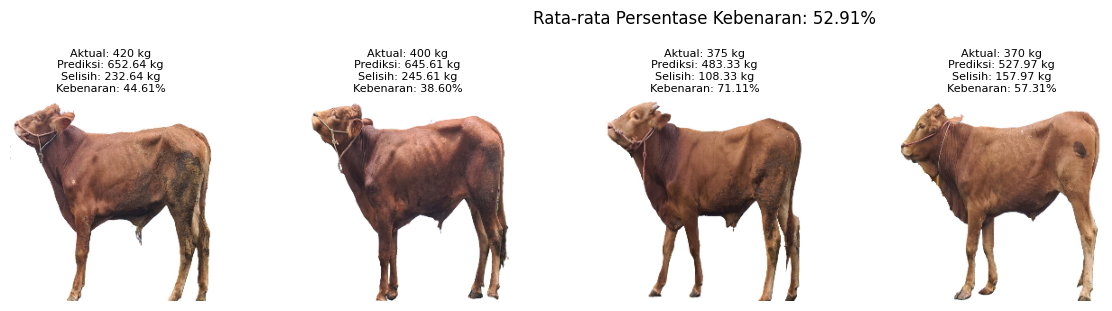

Rata-rata Persentase Kebenaran: 52.91%


In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import math
import zipfile

# Path file ZIP dataset uji
test_zip_path = '/content/test.zip'
extract_test_path = '/content/'

# Ekstrak jika belum ada
if not os.path.exists('/content/test'):
    if os.path.exists(test_zip_path):
        with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_test_path)
        print(f'File {test_zip_path} berhasil diekstrak ke {extract_test_path}')
    else:
        raise FileNotFoundError(f"File {test_zip_path} tidak ditemukan!")

# Load model
model_path = 'best_model.h5'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model {model_path} tidak ditemukan!")

best_model = tf.keras.models.load_model(model_path)

# Direktori gambar uji
segmented_dir = '/content/test'  # Sesuaikan path

if not os.path.exists(segmented_dir):
    raise FileNotFoundError(f"Folder {segmented_dir} tidak ditemukan!")

test_images = []
test_labels = []

# Load gambar dan label
for filename in os.listdir(segmented_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(segmented_dir, filename)

        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Peringatan: Gambar {filename} tidak dapat dibaca, dilewati.")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img, (224, 224)) / 255.0

            label = int(filename.split('.')[0])  # Pastikan format nama file sesuai

            test_images.append(img_array)
            test_labels.append(label)

        except Exception as e:
            print(f"Terjadi kesalahan saat memproses {filename}: {e}")
            continue

# Konversi ke numpy array
X_test = np.array(test_images)
y_test = np.array(test_labels)

if len(X_test) == 0:
    raise ValueError("Tidak ada data uji yang valid!")

# Prediksi
prediksi_bobot = best_model.predict(X_test)
selisih = np.abs(y_test - prediksi_bobot.flatten())
persentase_kebenaran = 100 * (1 - selisih / y_test)
rata_rata_persentase = np.mean(persentase_kebenaran)

# Visualisasi hasil
num_images = len(X_test)
cols = 5
rows = math.ceil(num_images / cols)

plt.figure(figsize=(cols * 3, rows * 3))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Aktual: {y_test[i]} kg\nPrediksi: {prediksi_bobot[i][0]:.2f} kg\nSelisih: {selisih[i]:.2f} kg\nKebenaran: {persentase_kebenaran[i]:.2f}%", fontsize=8, color='black')

plt.suptitle(f"Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%", fontsize=12, y=1.02)
plt.tight_layout()
plt.show()

# Menampilkan hasil statistik
print(f'Rata-rata Persentase Kebenaran: {rata_rata_persentase:.2f}%')